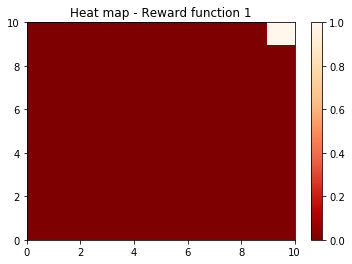

In [157]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#Question 1. generate heat maps of Reward function 1 and Reward function 2
rw_func1 = [[0 for i in range(10)] for j in range(10)]
rw_func2 = rw_func1.copy()

rw_func1[9][9] = 1

plt.pcolor(rw_func1, cmap = "OrRd_r")
plt.colorbar()
plt.title("Heat map - Reward function 1")
plt.show()

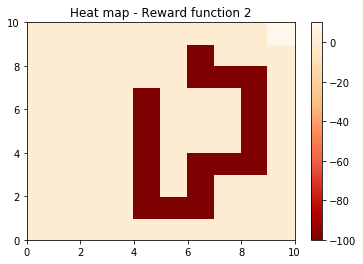

In [158]:
rw_func2[1][4:7] = [-100 for i in range(3)]
rw_func2[3][6:9] = [-100 for i in range(3)]
rw_func2[7][6:9] = [-100 for i in range(3)]
rw_func2[2][4] = -100
rw_func2[2][6] = -100
rw_func2[3][4] = -100
rw_func2[4][4] = -100
rw_func2[4][8] = -100
rw_func2[5][4] = -100
rw_func2[5][8] = -100
rw_func2[6][4] = -100
rw_func2[6][8] = -100
rw_func2[8][6] = -100
rw_func2[9][9] = 10


plt.pcolor(rw_func2, cmap = "OrRd_r")
plt.colorbar()
plt.title("Heat map - Reward function 2")
plt.show()

In [159]:
# Question 2

val = [0 for i in range(100)]
epsilon = 0.01
w = 0.1
Df = 0.8
rw_func = []
rw_func1 = np.array(rw_func1).transpose()
for row in rw_func1:
    rw_func += list(row)

# Calculate transitional probability
def trans_proba(cur_st, next_st, move, prob):
    left = cur_st - 10
    right = cur_st + 10
    up = cur_st - 1
    down = cur_st + 1
    if next_st == left:
        return 1-prob+prob/4 if move == 0 else prob/4
    if next_st == right:
        return 1-prob+prob/4 if move == 2 else prob/4
    if next_st == up:
        return 1-prob+prob/4 if move == 1 else prob/4
    if next_st == down:
        return 1-prob+prob/4 if move == 3 else prob/4
    if next_st == cur_st:
        res = 0
        if left < 0:
            res += (1-prob+prob/4) if move == 0 else prob/4
        if right > 99:
            res += (1-prob+prob/4) if move == 2 else prob/4
        if up % 10 == 9:
            res += (1-prob+prob/4) if move == 1 else prob/4
        if down % 10 == 0:
            res += (1-prob+prob/4) if move == 3 else prob/4
        return res
    return 0


def Bellman(cur_st, move, prob, Df, rw_func, val):
    next_states = [cur_st - 10, cur_st + 10, cur_st - 1, cur_st + 1, cur_st]
    res = 0
    for next_st in next_states:
        if not (next_st < 0 or next_st > 99 or (cur_st % 10 == 0 and next_st % 10 == 9) or (cur_st % 10 == 9 and next_st % 10 == 0)):
            res += trans_proba(cur_st, next_st, move, prob) * (rw_func[next_st] + Df * val[next_st])
    return res


# Procedure Value Iteration algo
def value_iteration(val, w, Df, rw_func, epsilon):
    for st in range(100):
        val[st] = 0
    delta = float('inf')
    while delta > epsilon:
        delta = 0
        temp = val[:]
        for st in range(100):
            v = val[st]
            val[st] = max(Bellman(st, 0, w, Df, rw_func, temp),Bellman(st, 1, w, Df, rw_func, temp),Bellman(st, 2, w, Df, rw_func, temp),Bellman(st, 3, w, Df, rw_func, temp))
            delta = max(delta, abs(v - val[st]))
    return val

Text(0.5,1,'Optimal values for each state - Reward function 1')

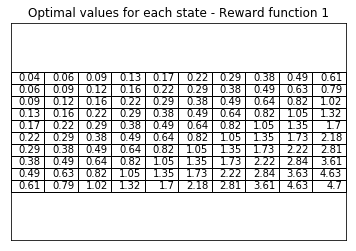

In [150]:
val = value_iteration(val, w, Df, rw_func, epsilon)
g1 = np.round(val, decimals=2).reshape(10, 10).transpose()
plt.table(cellText=g1,loc='center')
plt.xticks([])
plt.yticks([])
plt.title("Optimal values for each state - Reward function 1")

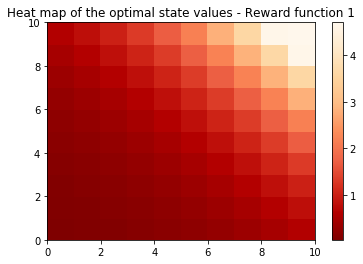

In [151]:
# Question 3
plt.figure()
plt.pcolor(g1, cmap = "OrRd_r")
plt.colorbar()
plt.title("Heat map of the optimal state values - Reward function 1")
plt.show()

Text(0.5,1,'Optimal action for each state - Reward function 1')

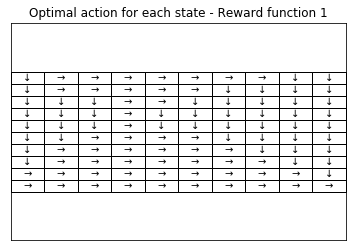

In [152]:
# Question 5
pi_st = [0 for i in range(100)]
directions = ['\u2190', '\u2191', '\u2192', '\u2193']
for st in range(100):
    pi_st[st] = directions[np.argmax([Bellman(st, 0, w, Df, rw_func, val),Bellman(st, 1, w, Df, rw_func, val),Bellman(st, 2, w, Df, rw_func, val),Bellman(st, 3, w, Df, rw_func, val)])]
pi = np.array(pi_st).reshape(10, 10).transpose()
plt.table(cellText=pi, loc='center', cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.title("Optimal action for each state - Reward function 1")

Text(0.5,1,'Optimal values for each state - Reward function 2')

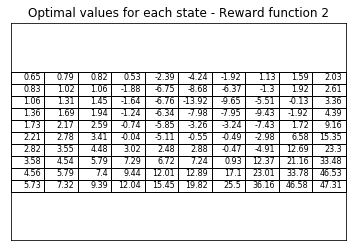

In [160]:
# Question 6
rw_func = []
rw_func2 = np.array(rw_func2).transpose()
for row in rw_func2:
    rw_func += list(row)

val = value_iteration(val, w, Df, rw_func, epsilon)
g2 = np.round(val, decimals=2).reshape(10, 10).transpose()
plt.table(cellText=g2,loc='center')
plt.xticks([])
plt.yticks([])
plt.title("Optimal values for each state - Reward function 2")

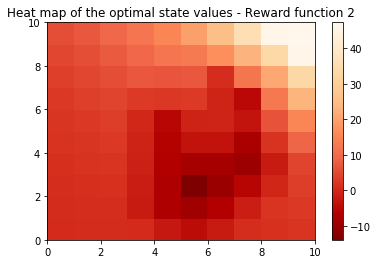

In [162]:
# Question 7
plt.figure()
plt.pcolor(g2, cmap = "OrRd_r")
plt.colorbar()
plt.title("Heat map of the optimal state values - Reward function 2")
plt.show()

Text(0.5,1,'Optimal action for each state - Reward function 2')

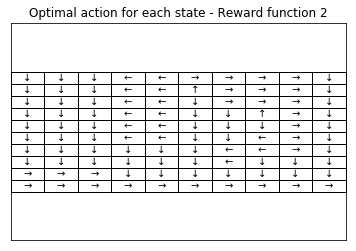

In [163]:
# Question 9
pi_st = [0 for i in range(100)]
directions = ['\u2190', '\u2191', '\u2192', '\u2193']
for st in range(100):
    pi_st[st] = directions[np.argmax([Bellman(st, 0, w, Df, rw_func, val),Bellman(st, 1, w, Df, rw_func, val),Bellman(st, 2, w, Df, rw_func, val),Bellman(st, 3, w, Df, rw_func, val)])]
pi = np.array(pi_st).reshape(10, 10).transpose()
plt.table(cellText=pi, loc='center', cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.title("Optimal action for each state - Reward function 2")